In [4]:

from IPython import display
display.clear_output()
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.24 🚀 Python-3.11.8 torch-2.2.1+cu121 CPU (AMD Ryzen 3 3250U with Radeon Graphics)
Setup complete ✅ (4 CPUs, 7.4 GB RAM, 264.5/467.9 GB disk)


In [5]:
from ultralytics import YOLO
from IPython.display import display, Image

In [6]:
!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="nfBDjbhZIESZICEXpniP")
project = rf.workspace("vallabha-group-of-companies").project("road-sign-dataset-vbcrx")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.196`


In [17]:
!yolo task=detect mode=train model=yolov8s.pt data='/content/ROAD-SIGN-DATASET-1/data.yaml' epochs=100 imgsz=416 plots=True

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/ROAD-SIGN-DATASET-1/data.yaml, epochs=100, patience=50, batch=16, imgsz=416, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simpl

In [21]:
cd ..

/content


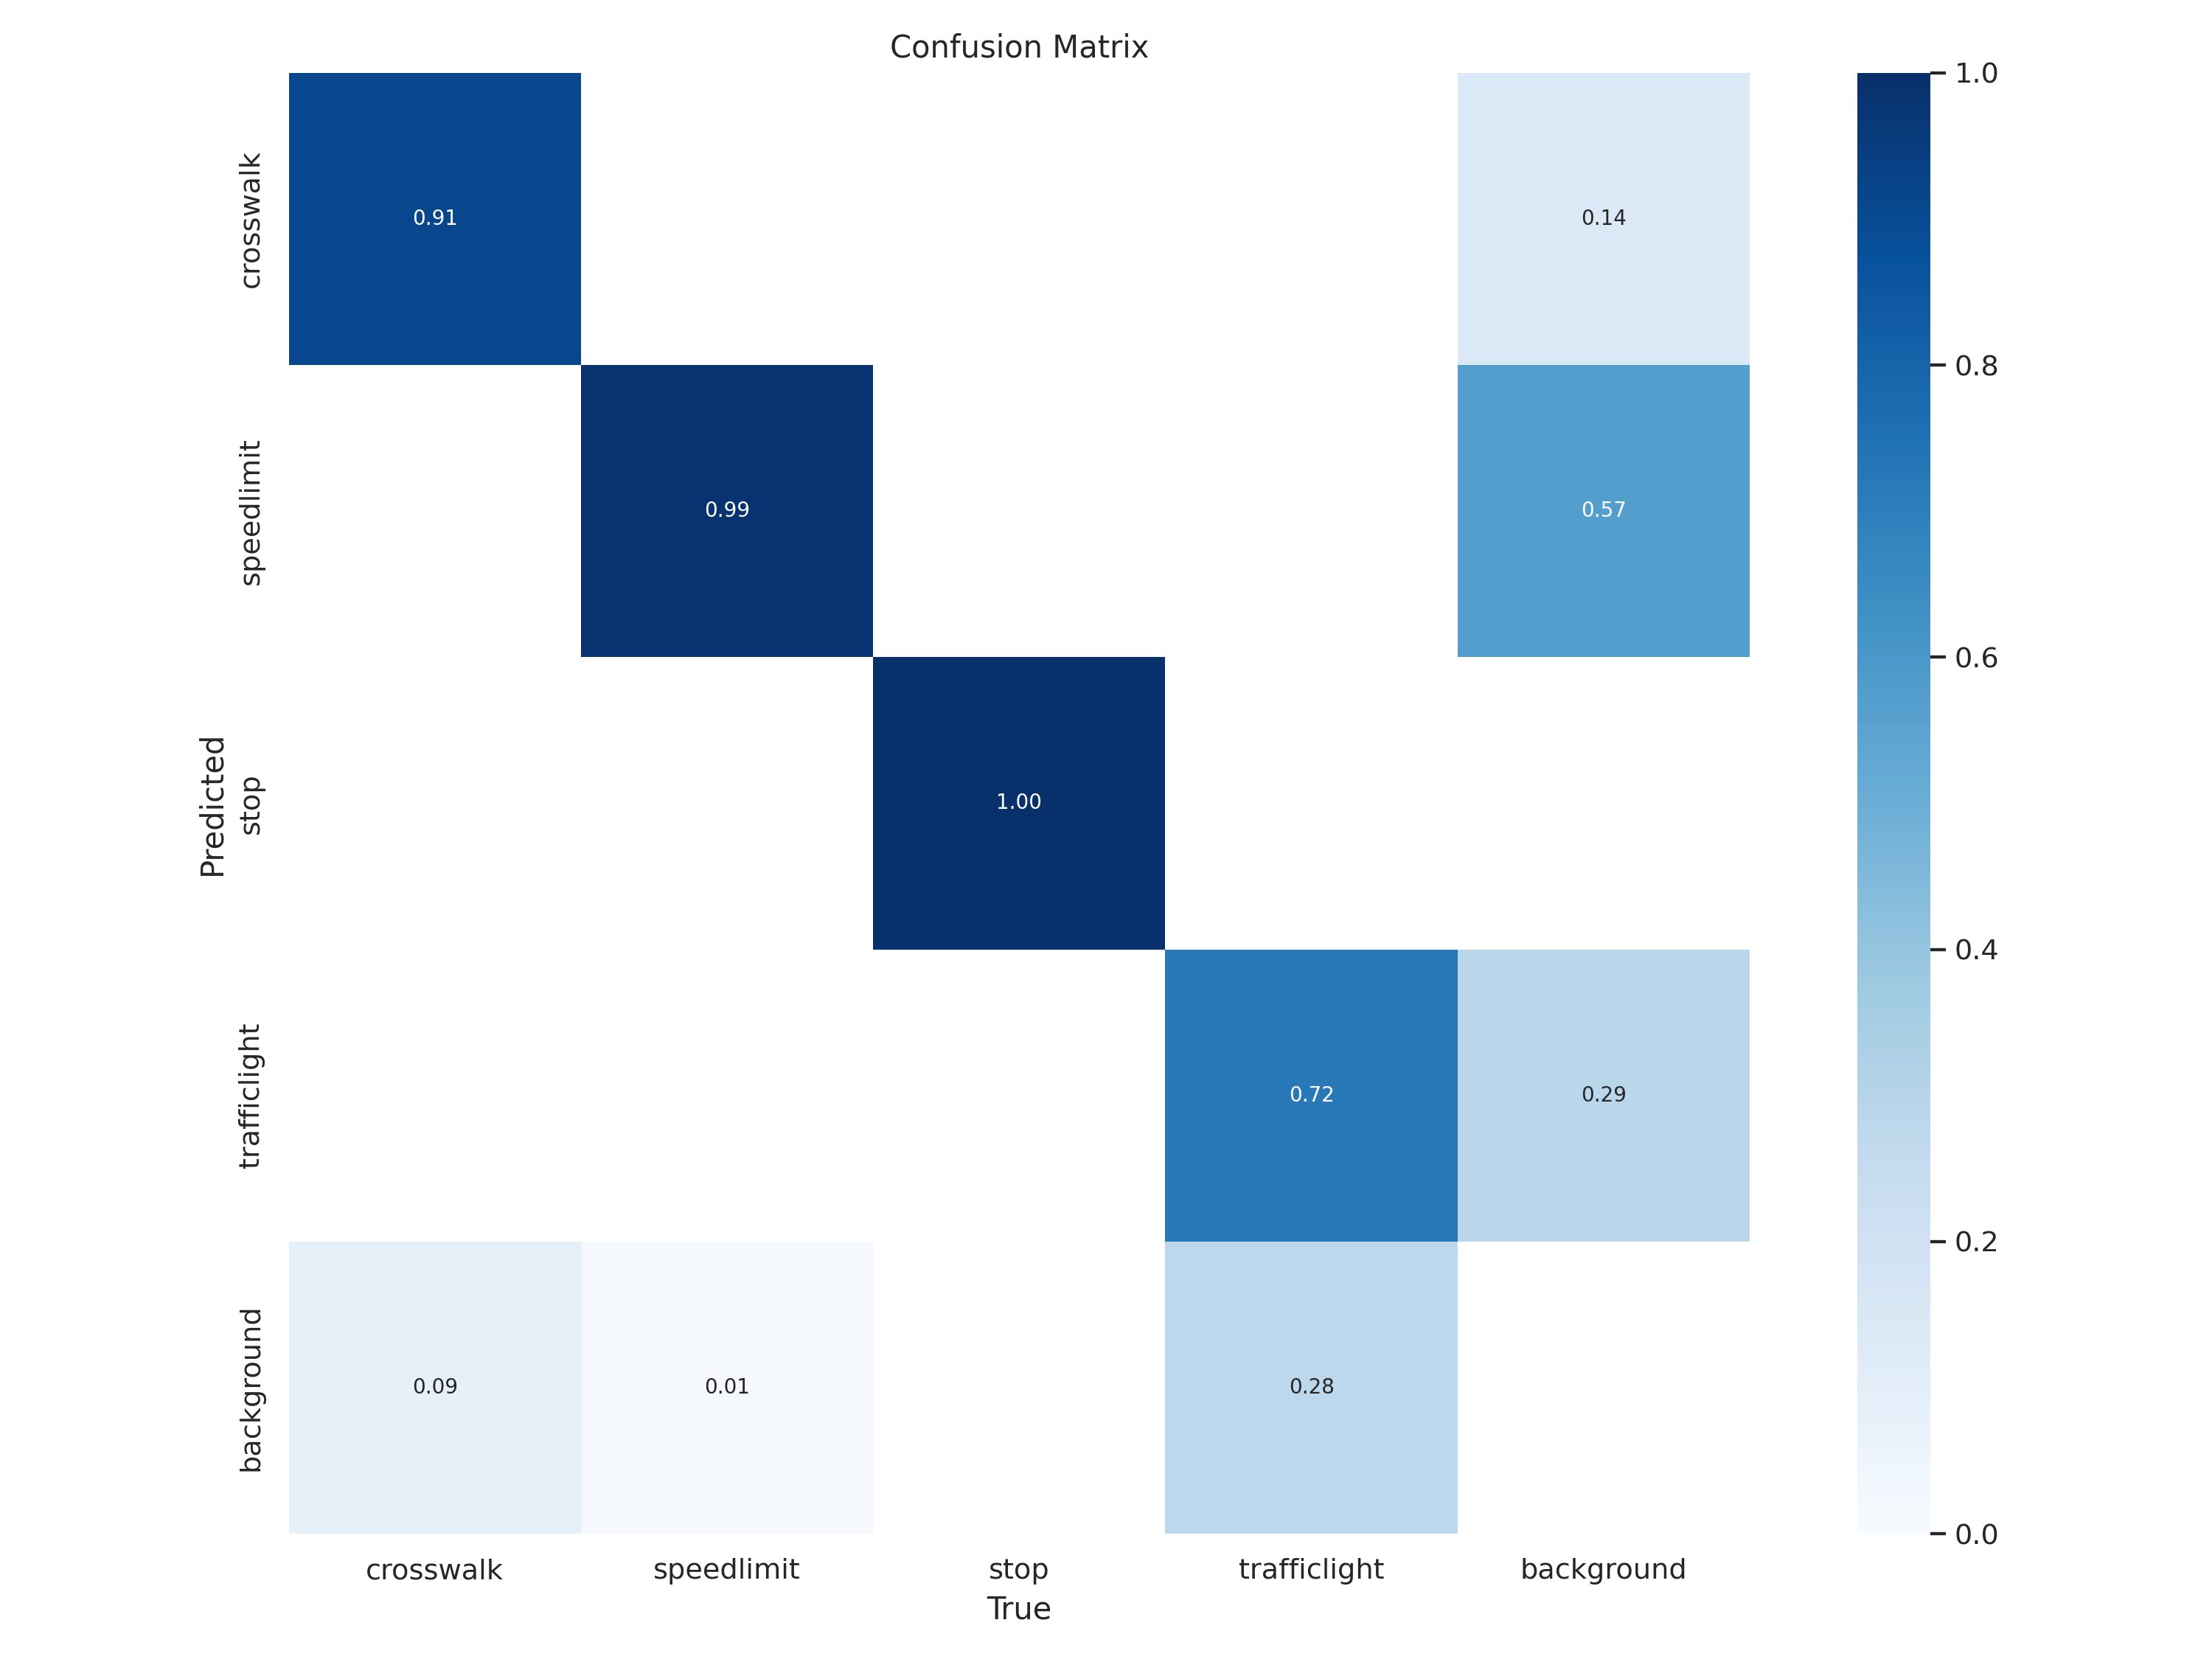

In [23]:
Image(filename='/content/ROAD-SIGN-DATASET-1/runs/detect/train3/confusion_matrix.png', width=600)

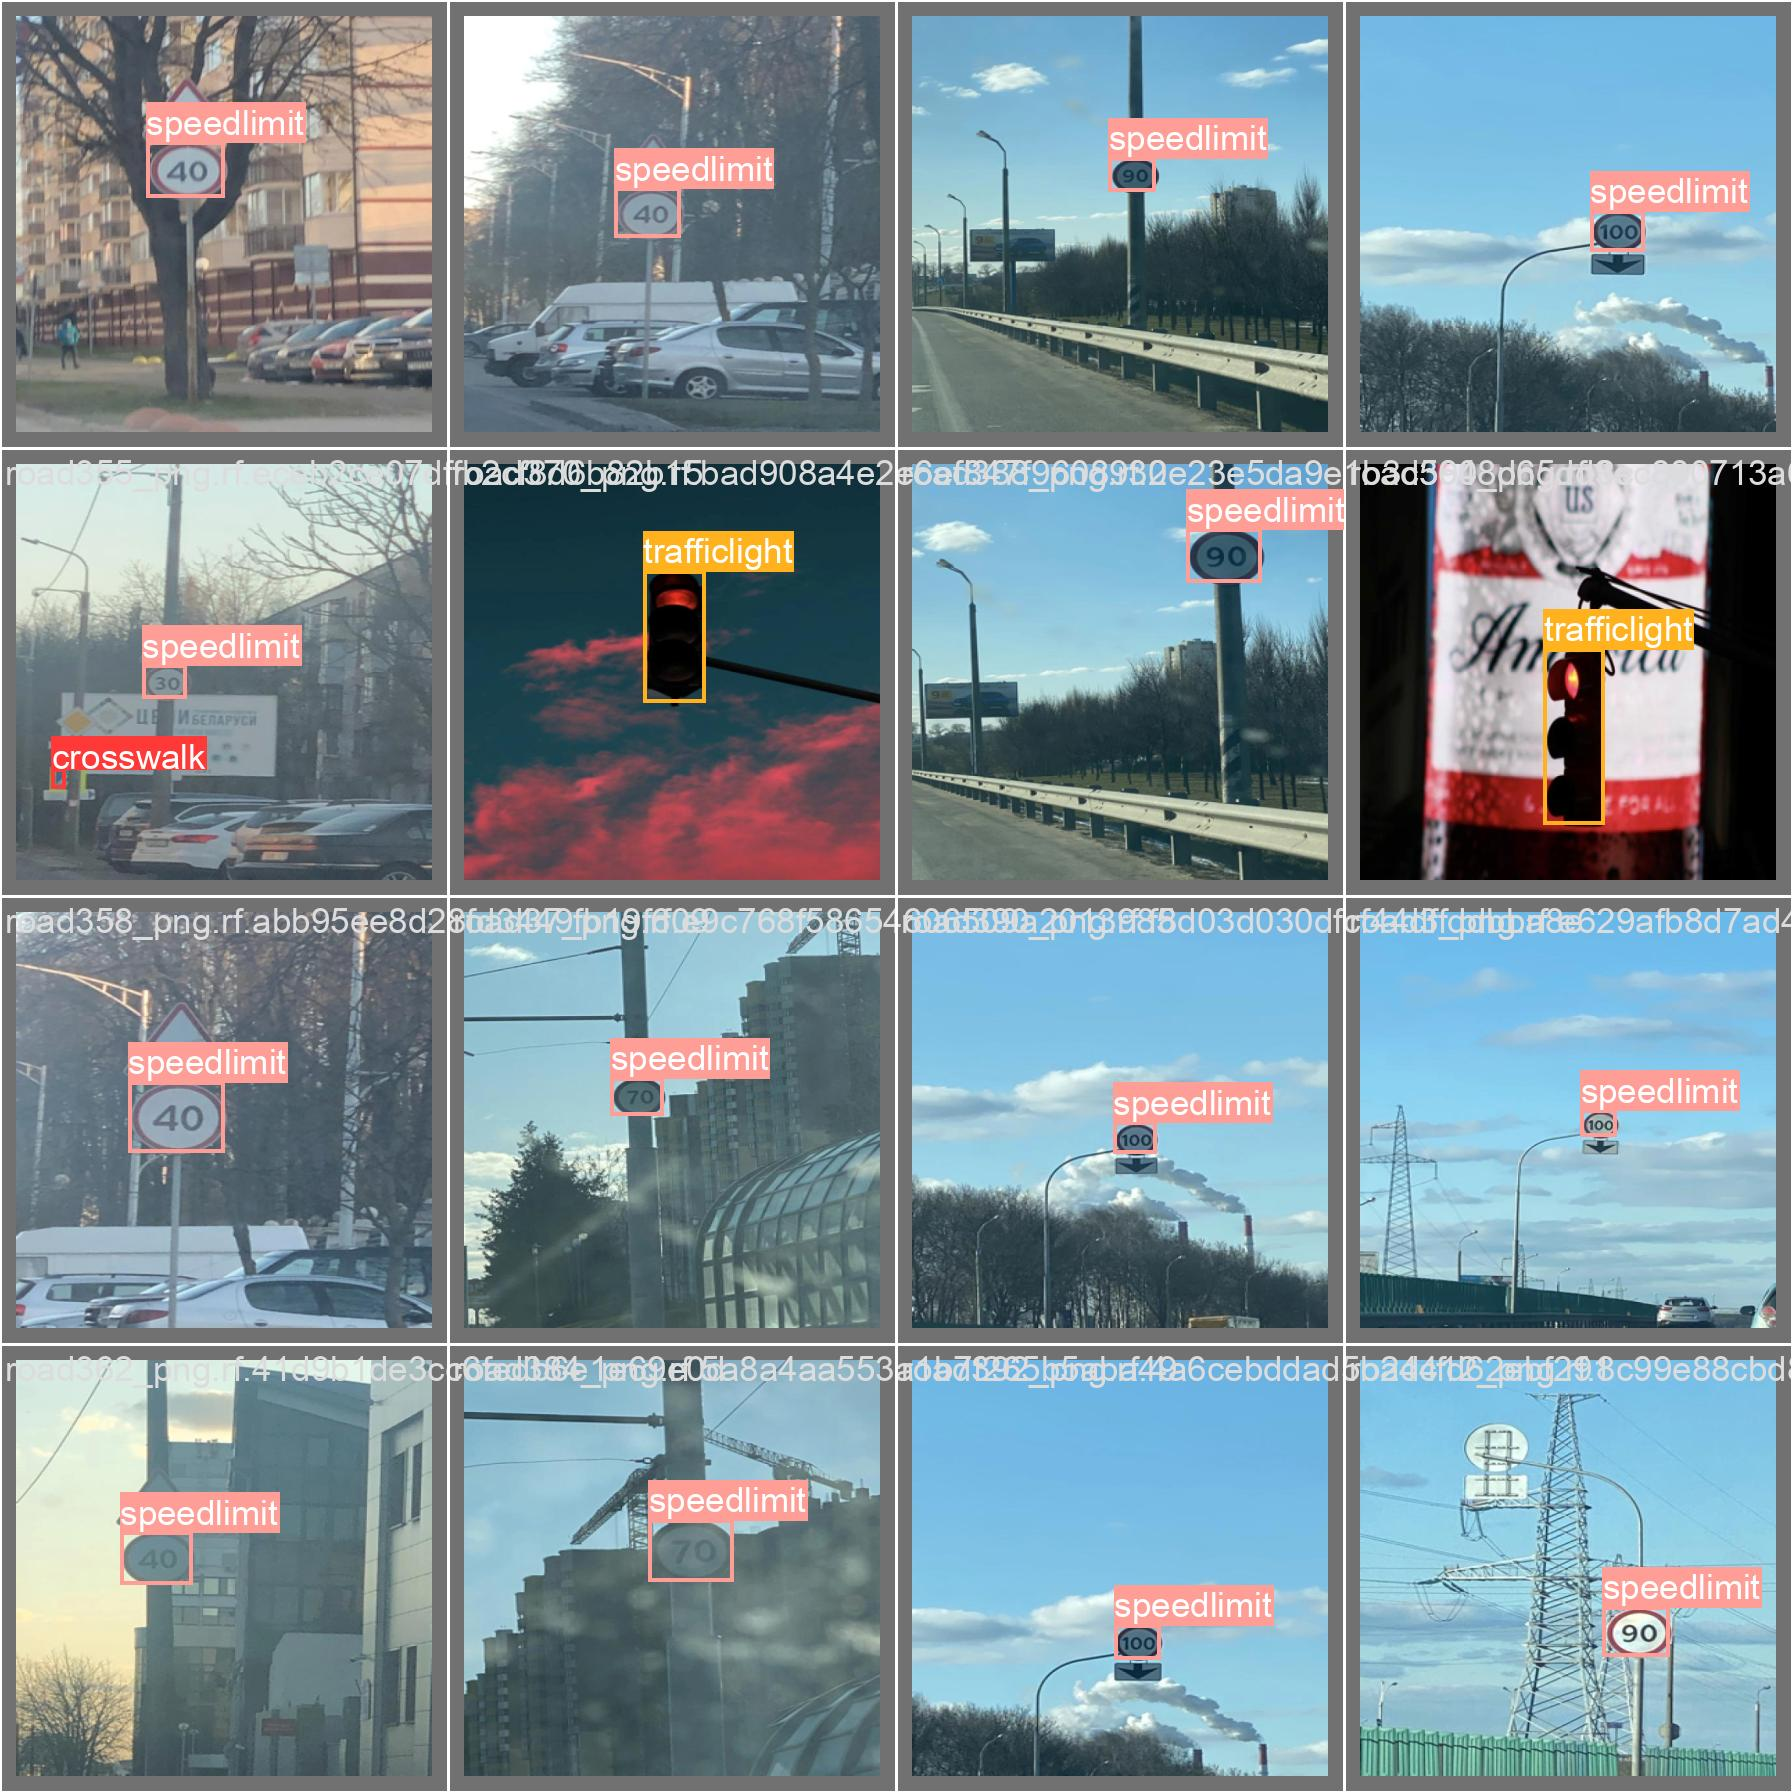

In [24]:
Image(filename='/content/ROAD-SIGN-DATASET-1/runs/detect/train3/val_batch2_labels.jpg', width=600)

In [25]:
!yolo task=detect mode=val model='/content/ROAD-SIGN-DATASET-1/runs/detect/train3/weights/best.pt' data='/content/ROAD-SIGN-DATASET-1/data.yaml'

2024-03-06 11:48:56.990900: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-06 11:48:56.990965: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-06 11:48:56.992512: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-06 11:48:58.014969: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/ROAD-SIGN-DATASET-1/valid/labels.cache... 175 imag

In [30]:
!yolo task=detect mode=predict model='/content/ROAD-SIGN-DATASET-1/runs/detect/train3/weights/best.pt' conf=0.25 source='/content/ROAD-SIGN-DATASET-1/test/images'

2024-03-06 12:00:40.120038: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-06 12:00:40.120088: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-06 12:00:40.121432: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-06 12:00:41.334167: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/88 /content/ROAD-SIGN-D

/content/ROAD-SIGN-DATASET-1/test/images/road658_png.rf.022548572e7940bc9922288d284e081f.jpg


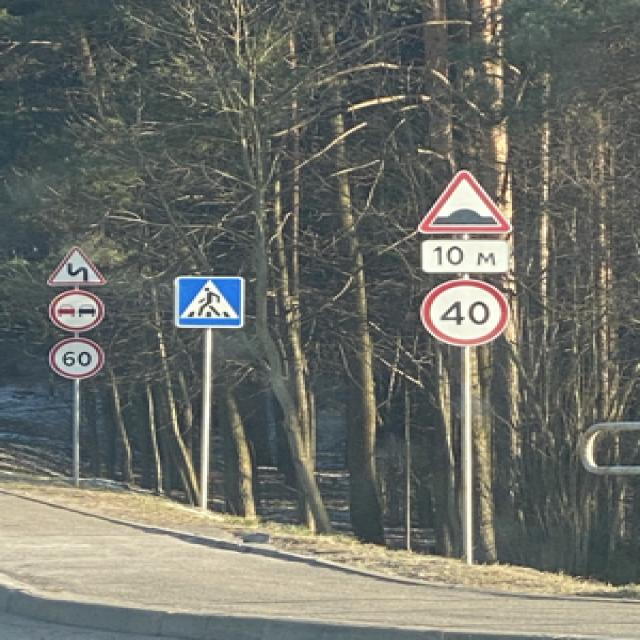



/content/ROAD-SIGN-DATASET-1/test/images/road306_png.rf.a1fdb92465ef0f57a4ca48cb457cabfd.jpg


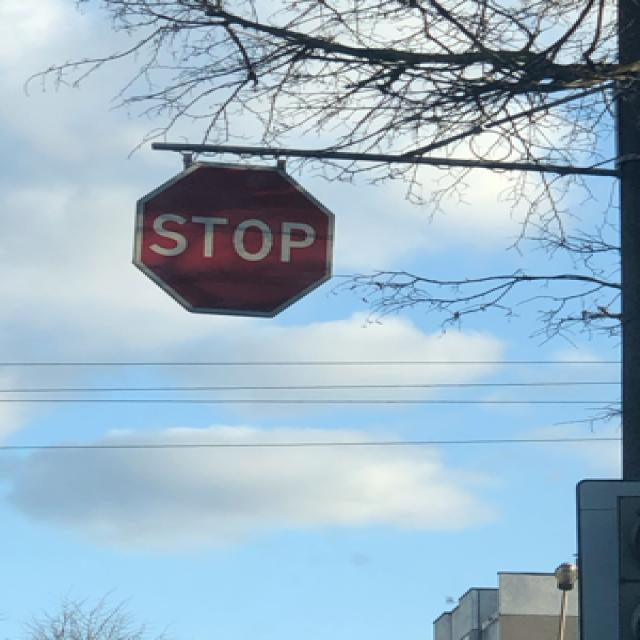



/content/ROAD-SIGN-DATASET-1/test/images/road466_png.rf.4b22302547bf4457a31ec31619b1561a.jpg


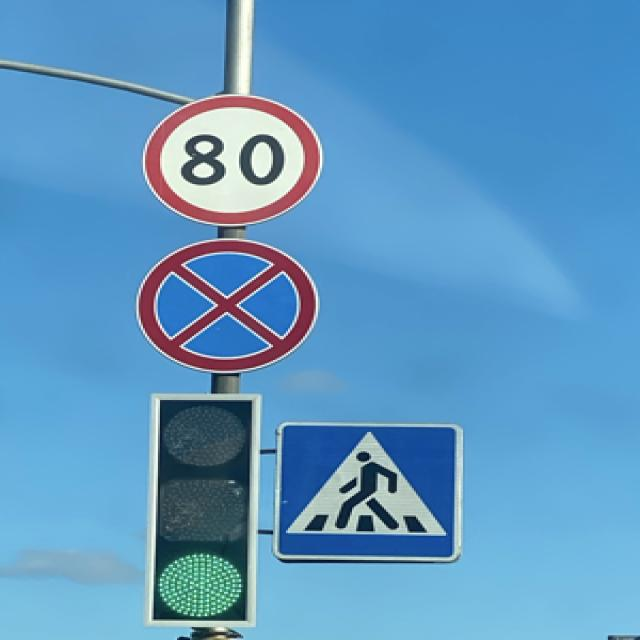



/content/ROAD-SIGN-DATASET-1/test/images/road126_png.rf.d4005a5381e82b6dd09b6c43a38c392d.jpg


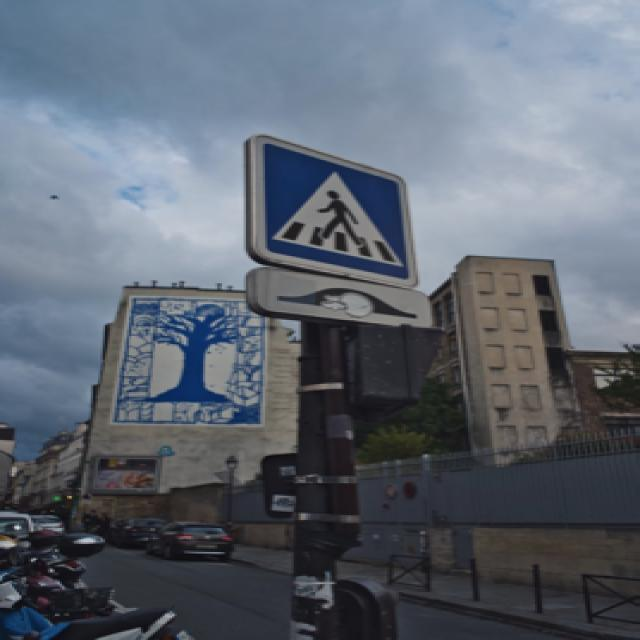



/content/ROAD-SIGN-DATASET-1/test/images/road596_png.rf.acb99c6929a4325ec85c95c4eef92f5f.jpg


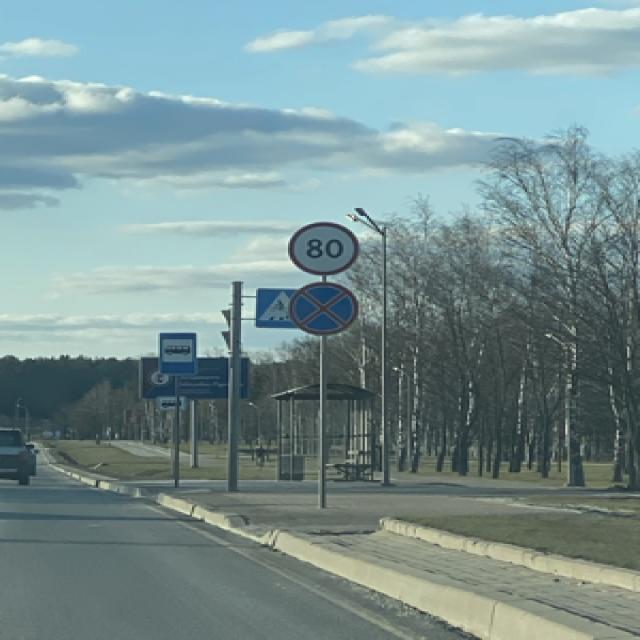

In [32]:
import glob
from IPython.display import Image, display
for image_path in glob.glob('/content/ROAD-SIGN-DATASET-1/test/images/*jpg')[:5]:
      print(image_path)
      display(Image(filename=image_path, width=600))
      print("\n")

In [6]:
!yolo task=detect mode=predict model='/home/user/Documents/ML_DL_PROJECTS/TrafficSignDetection_DL_CV_Project/yolov8_roadsign.pt' conf=0.5 source='/home/user/Documents/ML_DL_PROJECTS/TrafficSignDetection_DL_CV_Project/traffic_light.jpeg' save_txt=true save_conf=true

Ultralytics YOLOv8.1.24 🚀 Python-3.11.8 torch-2.2.1+cu121 CPU (AMD Ryzen 3 3250U with Radeon Graphics)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /home/user/Documents/ML_DL_PROJECTS/TrafficSignDetection_DL_CV_Project/traffic_light.jpeg: 416x416 1 trafficlight, 416.8ms
Speed: 5.6ms preprocess, 416.8ms inference, 7.5ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/predict
1 label saved to runs/detect/predict/labels
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
    # detect_command = f"!yolo task=detect mode=predict model='/home/user/Documents/ML_DL_PROJECTS/TrafficSignDetection_DL_CV_Project/yolov8_roadsign.pt' conf=0.5 source='/home/user/Documents/ML_DL_PROJECTS/TrafficSignDetection_DL_CV_Project/traffic_light.jpeg' save_txt=true save_conf=true"
